# Project: Investigate European Football

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, I have invesitgated European football players from 2008 to 2016.
The questions used for the investigation: 
 - Who are the top 5 players by overall score ? 
 - Which player of the top 5 was the most improved ? 
 - What are the characteristics that affect overall score ?

In [94]:
# import all packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [95]:
#load dataset and asses
df_players_attributes= pd.read_csv('Player_Attributes.csv')
df_players_attributes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [96]:
#check number of rows and columns 
df_players_attributes.shape

(183978, 42)

In [97]:
#load dataset and asses
df_players = pd.read_csv('Player.csv')
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [98]:
#check number of rows and columns
df_players.shape

(11060, 7)

In [99]:
#check for columns that have missing values
df_players_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [100]:
#check for columns that have missing values
df_players.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [101]:
#check for unique players
df_players.player_fifa_api_id.nunique()

11060

In [102]:
#check for unique players
df_players_attributes.player_fifa_api_id.nunique()

11062

In [103]:
#check for columns with missing values 
df_players.columns[df_players.isnull().any()]

Index([], dtype='object')

In [104]:
#check for columns with missing values
df_players_attributes.columns[df_players_attributes.isnull().any()]

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

 - No. of columns in each dataset: 7 (Players), 42 (Player Attributes)
 - No. of columns with missing values: 0 (Players), 38 (Player Attributes)
 - No. of unique footballers the both datasets: 11060 (Player), 11060 (Players Attributes)


In [105]:
# merge df_players_attributes to df_players to a new dataframe named df_player_ratings
df_player_ratings = pd.merge(df_players_attributes,
                             df_players[[
                                 'id', 'player_api_id', 'player_name',
                                 'player_fifa_api_id', 'birthday', 'height',
                                 'weight'
]],
                             on='player_api_id')


In [106]:
#check number of rows and columns
df_player_ratings.shape

(183978, 48)

In [107]:
#check df_player_ratings date column date is an object
df_player_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_x                  183978 non-null  int64  
 1   player_fifa_api_id_x  183978 non-null  int64  
 2   player_api_id         183978 non-null  int64  
 3   date                  183978 non-null  object 
 4   overall_rating        183142 non-null  float64
 5   potential             183142 non-null  float64
 6   preferred_foot        183142 non-null  object 
 7   attacking_work_rate   180748 non-null  object 
 8   defensive_work_rate   183142 non-null  object 
 9   crossing              183142 non-null  float64
 10  finishing             183142 non-null  float64
 11  heading_accuracy      183142 non-null  float64
 12  short_passing         183142 non-null  float64
 13  volleys               181265 non-null  float64
 14  dribbling             183142 non-null  float64
 15  

In [108]:
#change the date column to datetime type using pandas' .to_datetime() method
df_player_ratings['date']=pd.to_datetime(df_player_ratings['date'])

In [109]:
#check the date column is datetime
df_player_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_x                  183978 non-null  int64         
 1   player_fifa_api_id_x  183978 non-null  int64         
 2   player_api_id         183978 non-null  int64         
 3   date                  183978 non-null  datetime64[ns]
 4   overall_rating        183142 non-null  float64       
 5   potential             183142 non-null  float64       
 6   preferred_foot        183142 non-null  object        
 7   attacking_work_rate   180748 non-null  object        
 8   defensive_work_rate   183142 non-null  object        
 9   crossing              183142 non-null  float64       
 10  finishing             183142 non-null  float64       
 11  heading_accuracy      183142 non-null  float64       
 12  short_passing         183142 non-null  float64       
 13 

In [110]:
#group players by date
df_player_ratings.groupby('player_api_id')['date'].max()

player_api_id
2625     2015-01-16
2752     2015-10-16
2768     2016-03-17
2770     2013-07-05
2790     2010-08-30
            ...    
744907   2016-06-09
746419   2016-05-12
748432   2016-05-12
750435   2016-04-14
750584   2016-05-19
Name: date, Length: 11060, dtype: datetime64[ns]

In [111]:
#get the most recent date
df_player_ratings.groupby('player_api_id')['date'].idxmax()

player_api_id
2625      139843
2752       44144
2768       88284
2770       72141
2790        5121
           ...  
744907     66601
746419     58304
748432     60179
750435    147408
750584      8085
Name: date, Length: 11060, dtype: int64

In [112]:
#index to filter orginal df_player_ratings to include max values for each player
index = df_player_ratings.groupby('player_api_id')['date'].idxmax().values

In [113]:
#define the a new data frame
df_recent_player_rating = df_player_ratings.loc[index].copy()

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1) Top 5 players by overall score

In [114]:
df_recent_player_rating.sort_values(by=['overall_rating'], ascending=False).head(5)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
102482,102483,158023,30981,2015-12-17,94.0,94.0,left,medium,low,80.0,...,11.0,15.0,14.0,8.0,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
33330,33331,20801,30893,2015-10-16,93.0,93.0,right,high,low,82.0,...,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
105983,105984,176580,40636,2015-10-16,90.0,90.0,right,high,medium,77.0,...,25.0,31.0,33.0,37.0,6377,Luis Suarez,176580,1987-01-24 00:00:00,182.88,187
131464,131465,190871,19533,2016-02-04,90.0,94.0,right,high,medium,72.0,...,9.0,15.0,15.0,11.0,7867,Neymar,190871,1992-02-05 00:00:00,175.26,150
109033,109034,167495,27299,2016-04-21,90.0,90.0,right,medium,medium,15.0,...,87.0,91.0,90.0,87.0,6556,Manuel Neuer,167495,1986-03-27 00:00:00,193.04,203


In [115]:
df_top5 = df_recent_player_rating.sort_values(by=['overall_rating'],ascending=False).head(5)


<AxesSubplot:xlabel='player_name'>

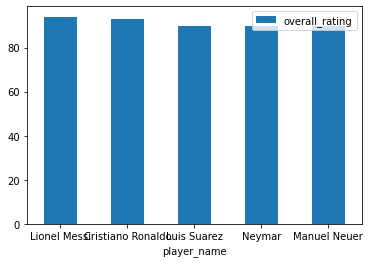

In [116]:
df_top5.plot.bar(x='player_name', y='overall_rating', rot=0)

In [117]:
#Top 5 players Lionel Messi, Cristiano Ronaldo, Luis Suarez, Neymar, Manuel Neuer

### Research Question 2) Most Improved player

In [118]:
#define season from datetime
def to_season(date):
    if date.month >= 7:
        return str(date.year) + "/" + str(date.year + 1)
    else:
        return str(date.year - 1) + "/" + str(date.year)


In [119]:
#add season to dataframe
df_player_ratings['season'] = df_player_ratings['date'].apply(lambda t: to_season(t))

In [120]:
#Lionel messi improvement
df_messi_rating = df_player_ratings.loc[df_player_ratings['player_fifa_api_id_x'] == 158023]

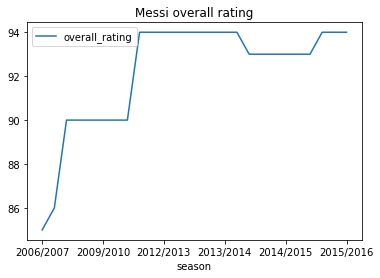

In [121]:
df_messi_rating.plot(x='season', y='overall_rating',kind='line',title= 'Messi overall rating').invert_xaxis()


In [122]:
messi_season_rating = df_messi_rating.groupby('season')['overall_rating'].mean()


In [123]:
messi_season_rating

season
2006/2007    85.0
2007/2008    86.0
2008/2009    90.0
2009/2010    90.0
2010/2011    90.0
2011/2012    94.0
2012/2013    94.0
2013/2014    94.0
2014/2015    93.0
2015/2016    94.0
Name: overall_rating, dtype: float64

In [124]:
messi_season_rating.max() - messi_season_rating.min()

9.0

In [125]:
df_Ronaldo_rating = df_player_ratings.loc[df_player_ratings['player_fifa_api_id_x'] == 20801]


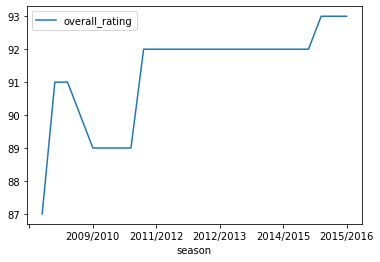

In [126]:
df_Ronaldo_rating.plot(x='season', y='overall_rating',kind='line').invert_xaxis()


In [127]:
Ronaldo_season_rating = df_Ronaldo_rating.groupby('season')['overall_rating'].mean()


In [128]:
Ronaldo_season_rating

season
2006/2007    87.0
2007/2008    91.0
2008/2009    90.5
2009/2010    89.0
2010/2011    89.0
2011/2012    92.0
2012/2013    92.0
2013/2014    92.0
2014/2015    92.0
2015/2016    93.0
Name: overall_rating, dtype: float64

In [129]:
Ronaldo_season_rating.max() - Ronaldo_season_rating.min()

6.0

In [130]:
df_Suarez_rating = df_player_ratings.loc[df_player_ratings['player_fifa_api_id_x'] == 176580]


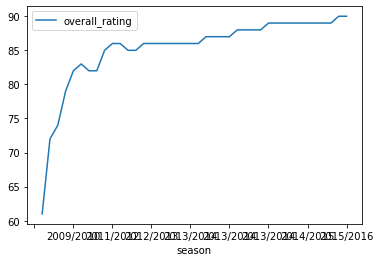

In [131]:
df_Suarez_rating.plot(x='season', y='overall_rating',kind='line').invert_xaxis()


In [132]:
Suarez_season_rating = df_Suarez_rating.groupby('season')['overall_rating'].mean()


In [133]:
Suarez_season_rating

season
2006/2007    61.000000
2007/2008    72.000000
2008/2009    76.500000
2009/2010    82.500000
2010/2011    82.000000
2011/2012    85.500000
2012/2013    85.777778
2013/2014    87.363636
2014/2015    89.000000
2015/2016    90.000000
Name: overall_rating, dtype: float64

In [134]:
Suarez_season_rating.max() - Suarez_season_rating.min()

29.0

In [135]:
df_neymar_rating = df_player_ratings.loc[df_player_ratings['player_fifa_api_id_x'] == 190871]


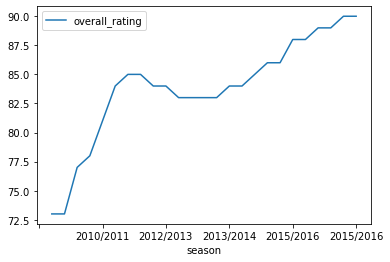

In [136]:
df_neymar_rating.plot(x='season', y='overall_rating',kind='line').invert_xaxis()


In [137]:
neymar_season_rating = df_neymar_rating.groupby('season')['overall_rating'].mean()


In [138]:
neymar_season_rating

season
2006/2007    73.000000
2009/2010    75.000000
2010/2011    79.500000
2011/2012    84.500000
2012/2013    83.571429
2013/2014    84.333333
2014/2015    86.000000
2015/2016    89.000000
Name: overall_rating, dtype: float64

In [139]:
neymar_season_rating.max() - neymar_season_rating.min()

16.0

In [140]:
df_Neuer_rating = df_player_ratings.loc[
    df_player_ratings['player_fifa_api_id_x'] == 167495]


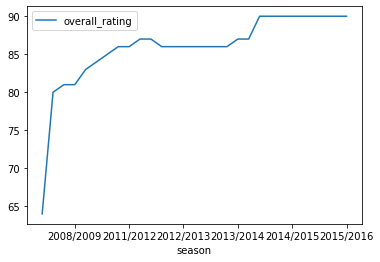

In [141]:
df_Neuer_rating.plot(x='season', y='overall_rating',kind='line').invert_xaxis()


In [142]:
Neuer_season_rating = df_Neuer_rating.groupby('season')['overall_rating'].mean()


In [143]:
Neuer_season_rating

season
2006/2007    64.0
2007/2008    80.0
2008/2009    81.0
2009/2010    83.5
2010/2011    85.5
2011/2012    86.5
2012/2013    86.2
2013/2014    86.4
2014/2015    90.0
2015/2016    90.0
Name: overall_rating, dtype: float64

In [144]:
Neuer_season_rating.max() - Neuer_season_rating.min()

26.0

In [145]:
#Most improved player is Suarez

### Research Question 3  Characteristics with overall rating

<AxesSubplot:xlabel='dribbling', ylabel='overall_rating'>

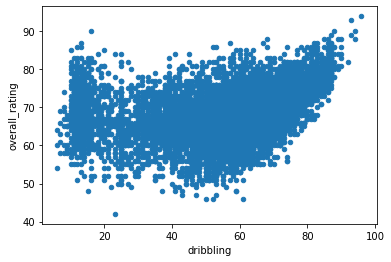

In [146]:
df_recent_player_rating.plot(x='dribbling', y='overall_rating', kind='scatter')

<AxesSubplot:xlabel='heading_accuracy', ylabel='overall_rating'>

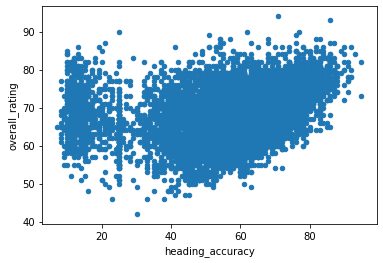

In [147]:
df_recent_player_rating.plot(x='heading_accuracy', y='overall_rating', kind='scatter')


<AxesSubplot:xlabel='agility', ylabel='overall_rating'>

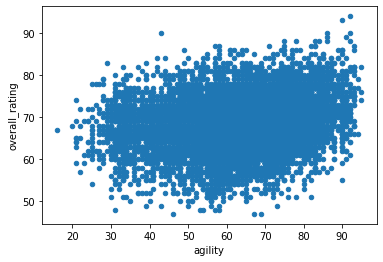

In [148]:
df_recent_player_rating.plot(x='agility', y='overall_rating', kind='scatter')


<AxesSubplot:xlabel='shot_power', ylabel='overall_rating'>

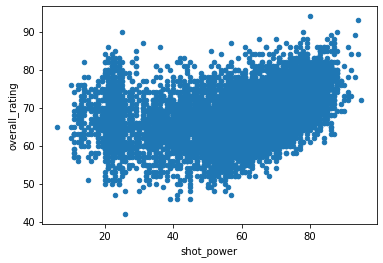

In [149]:
df_recent_player_rating.plot(x='shot_power', y='overall_rating', kind='scatter')

<a id='conclusions'></a>
## Conclusions
 - The best European football player is Messi and the top 5 consist of Lionel Messi, Cristiano Ronaldo, Luis Suarez, Neymar, Manuel Neuer
 - Out of the top 5 Luis Surarez is the most improved player 
 - The characteristics that affect a players overall score are dribbling, heading accuracy, agility and shot power

In [150]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1